In [3]:
import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\brind\Downloads\Employee-Attrition - Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Step 2 — Quick structure & missing values

df.shape # tells how many rows and columns we have 

(1470, 35)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isna().sum().sort_values(ascending=False).head(15)

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobInvolvement             0
JobLevel                   0
dtype: int64

In [ ]:
df.describe(include='all').T.head(20)

In [10]:

# Step 3 — Basic cleaning & target prep


# Drop constant/ID-like columns if they exist
to_drop = [c for c in ["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"] if c in df.columns]
df = df.drop(columns=to_drop, errors="ignore")

In [12]:
# Convert Attrition Yes/No -> 1/0
if "Attrition" not in df.columns:
    raise ValueError("Missing target column: Attrition")

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0}).astype(int)

In [13]:
# Keep a clean copy
df_clean = df.copy()
df_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [14]:
#Step 4 — Handle missing values (simple)

# If any numeric columns have NaNs -> fill with median
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_clean.select_dtypes(include=["object"]).columns.tolist()

df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

In [15]:
# If any categorical columns have NaNs -> fill with mode
for c in cat_cols:
    if df_clean[c].isna().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode(dropna=True)[0])

df_clean.isna().sum().sum()  # should be 0

np.int64(0)

In [ ]:
#Step 5 — EDA (target balance & a couple of key views)

import matplotlib.pyplot as plt

attr_counts = df_clean["Attrition"].value_counts().sort_index()
print(attr_counts)
attr_counts.plot(kind="bar")
plt.title("Attrition distribution (0=Stay, 1=Leave)")
plt.show()

In [ ]:
# Attrition by Department
if "Department" in df_clean.columns:
    df_clean.groupby("Department")["Attrition"].mean().sort_values(ascending=False).plot(kind="bar")
    plt.title("Attrition rate by Department")
    plt.ylabel("Mean attrition")
    plt.show()

In [ ]:
# Income by Attrition (boxplot)
if "MonthlyIncome" in df_clean.columns:
    df_clean.boxplot(column="MonthlyIncome", by="Attrition", grid=False)
    plt.title("MonthlyIncome by Attrition")
    plt.suptitle("")
    plt.show()

In [ ]:
# Quick numeric correlation heatmap
num_df = df_clean.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Numeric correlation (quick view)")
plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)
plt.tight_layout()
plt.show()

In [20]:
#Step 6 — Train/Test split

from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=["Attrition"])
y = df_clean["Attrition"]

# Identify categorical columns for encoding
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

len(X_train), len(X_test), y.mean().round(3), y_train.mean().round(3), y_test.mean().round(3)

(1176, 294, np.float64(0.161), np.float64(0.162), np.float64(0.16))

In [21]:
#Step 7 — Preprocessing (One-Hot Encode categoricals)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess_ohe = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

In [22]:
#Step 8 — Logistic Regression (baseline)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

lr_clf = Pipeline(steps=[
    ("prep", preprocess_ohe),
    # Scale after OHE: use with_mean=False to handle sparse matrices safely
    ("scale", StandardScaler(with_mean=False)),
    ("model", LogisticRegression(max_iter=200, class_weight="balanced", solver="liblinear", random_state=42))
])

lr_clf.fit(X_train, y_train)

,steps,"[('prep', ...), ('scale', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
#Step 9 — Evaluate Logistic Regression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
)

lr_proba = lr_clf.predict_proba(X_test)[:, 1]
lr_pred_05 = (lr_proba >= 0.5).astype(int)

print("LR @0.5 - Accuracy:", round(accuracy_score(y_test, lr_pred_05), 3))
print("LR @0.5 - Precision:", round(precision_score(y_test, lr_pred_05, zero_division=0), 3))
print("LR @0.5 - Recall:", round(recall_score(y_test, lr_pred_05), 3))
print("LR @0.5 - F1:", round(f1_score(y_test, lr_pred_05), 3))
print("LR - ROC AUC:", round(roc_auc_score(y_test, lr_proba), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred_05))
print("\nClassification report:\n", classification_report(y_test, lr_pred_05, digits=3))

LR @0.5 - Accuracy: 0.748
LR @0.5 - Precision: 0.337
LR @0.5 - Recall: 0.596
LR @0.5 - F1: 0.431
LR - ROC AUC: 0.799
Confusion Matrix:
 [[192  55]
 [ 19  28]]

Classification report:
               precision    recall  f1-score   support

           0      0.910     0.777     0.838       247
           1      0.337     0.596     0.431        47

    accuracy                          0.748       294
   macro avg      0.624     0.687     0.635       294
weighted avg      0.818     0.748     0.773       294



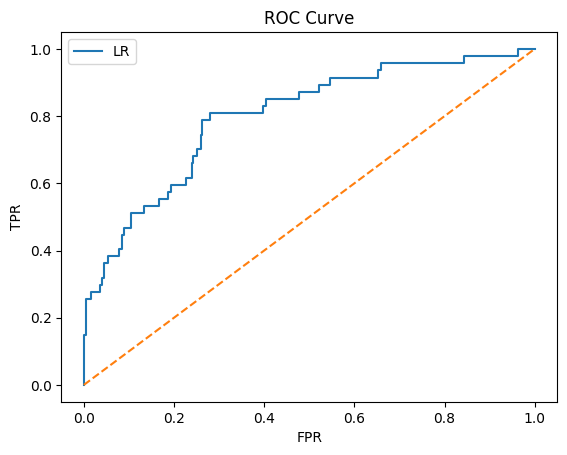

LR best F1 threshold ≈ 0.398 (F1=0.497)


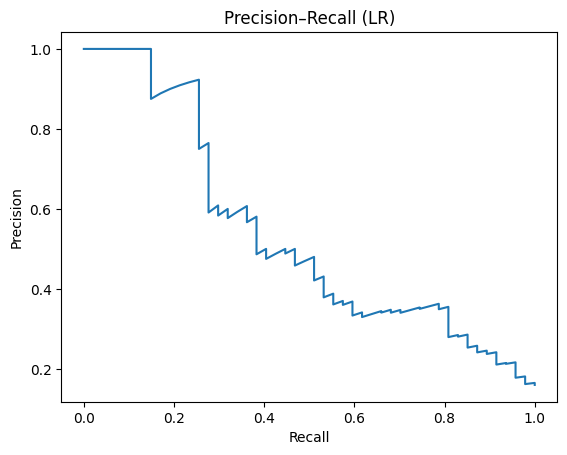

In [25]:
# ROC curve (LR)
fpr, tpr, _ = roc_curve(y_test, lr_proba)
plt.plot(fpr, tpr, label="LR")
plt.plot([0,1],[0,1],"--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend(); plt.show()

# Precision–Recall curve + best F1 threshold (LR)
prec, rec, thr = precision_recall_curve(y_test, lr_proba)
f1s = (2*prec*rec)/(prec+rec+1e-9)
best_idx = np.argmax(f1s)
best_thr_lr = thr[max(best_idx-1, 0)] if best_idx < len(thr) else 0.5
best_f1_lr = f1s[best_idx]
print(f"LR best F1 threshold ≈ {best_thr_lr:.3f} (F1={best_f1_lr:.3f})")

plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall (LR)")
plt.show()

In [26]:
#Step 10 — Random Forest (main)

from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ("prep", preprocess_ohe),
    ("model", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced_subsample",
        min_samples_leaf=2
    ))
])

rf_clf.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [28]:
#Step 11 — Evaluate Random Forest

rf_proba = rf_clf.predict_proba(X_test)[:, 1]
rf_pred_05 = (rf_proba >= 0.5).astype(int)

print("RF @0.5 - Accuracy:", round(accuracy_score(y_test, rf_pred_05), 3))
print("RF @0.5 - Precision:", round(precision_score(y_test, rf_pred_05, zero_division=0), 3))
print("RF @0.5 - Recall:", round(recall_score(y_test, rf_pred_05), 3))
print("RF @0.5 - F1:", round(f1_score(y_test, rf_pred_05), 3))
print("RF - ROC AUC:", round(roc_auc_score(y_test, rf_proba), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred_05))
print("\nClassification report:\n", classification_report(y_test, rf_pred_05, digits=3))

RF @0.5 - Accuracy: 0.84
RF @0.5 - Precision: 0.5
RF @0.5 - Recall: 0.17
RF @0.5 - F1: 0.254
RF - ROC AUC: 0.784
Confusion Matrix:
 [[239   8]
 [ 39   8]]

Classification report:
               precision    recall  f1-score   support

           0      0.860     0.968     0.910       247
           1      0.500     0.170     0.254        47

    accuracy                          0.840       294
   macro avg      0.680     0.569     0.582       294
weighted avg      0.802     0.840     0.806       294



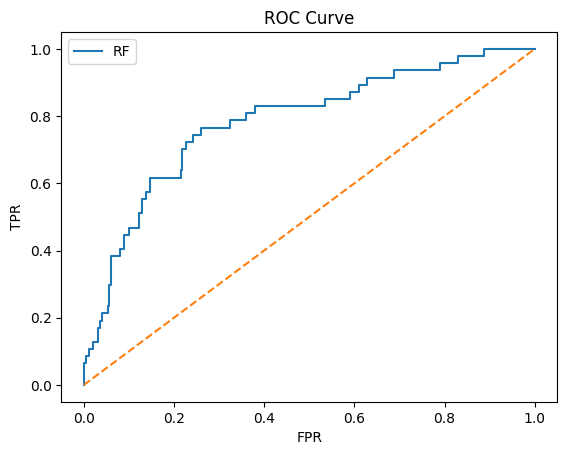

RF best F1 threshold ≈ 0.280 (F1=0.518)


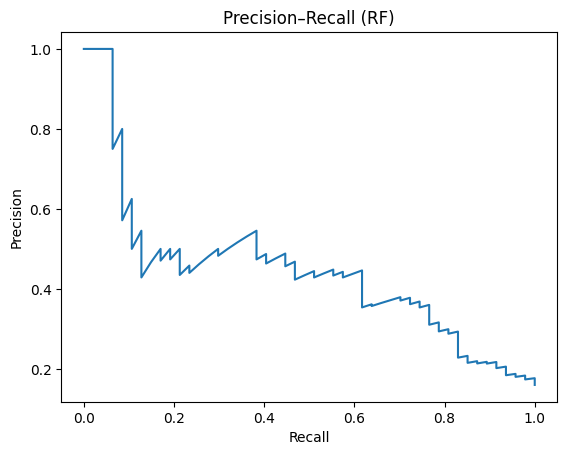

In [29]:
# ROC (RF)
fpr, tpr, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr, tpr, label="RF")
plt.plot([0,1],[0,1],"--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend(); plt.show()

# Precision–Recall + best F1 threshold (RF)
prec, rec, thr = precision_recall_curve(y_test, rf_proba)
f1s = (2*prec*rec)/(prec+rec+1e-9)
best_idx = np.argmax(f1s)
best_thr_rf = thr[max(best_idx-1, 0)] if best_idx < len(thr) else 0.5
best_f1_rf = f1s[best_idx]
print(f"RF best F1 threshold ≈ {best_thr_rf:.3f} (F1={best_f1_rf:.3f})")

plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall (RF)")
plt.show()

In [30]:
#Step 12 — Pick the better model

# Compare by F1 (you can switch to ROC AUC if preferred)
lr_f1 = f1_score(y_test, (lr_proba >= 0.5).astype(int))
rf_f1 = f1_score(y_test, (rf_proba >= 0.5).astype(int))

if rf_f1 >= lr_f1:
    best_model = rf_clf
    best_name = "RandomForest"
    best_threshold = float(best_thr_rf)
else:
    best_model = lr_clf
    best_name = "LogisticRegression"
    best_threshold = float(best_thr_lr)

best_name, best_threshold


('LogisticRegression', 0.39810052228493176)

In [52]:
#Step 13 — Feature importance / coefficients

# Get feature names from the OHE step
ohe = best_model.named_steps["prep"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(ohe.feature_names_in_).tolist()
all_features = cat_features + [c for c in X.columns if c not in ohe.feature_names_in_]

if best_name == "RandomForest":
    importances = best_model.named_steps["model"].feature_importances_
else:  # LogisticRegression
    importances = np.abs(best_model.named_steps["model"].coef_[0])

fi = (pd.DataFrame({"feature": all_features, "importance": importances})
        .sort_values("importance", ascending=False)
        .head(20))
fi

,feature,importance
27,OverTime_Yes,0.749797
35,JobLevel,0.682638
44,TotalWorkingYears,0.669361
16,JobRole_Laboratory Technician,0.603525
1,BusinessTravel_Travel_Frequently,0.562770
15,JobRole_Human Resources,0.557066
19,JobRole_Research Director,0.527489
49,YearsSinceLastPromotion,0.497077
25,MaritalStatus_Single,0.478381
50,YearsWithCurrManager,0.469319


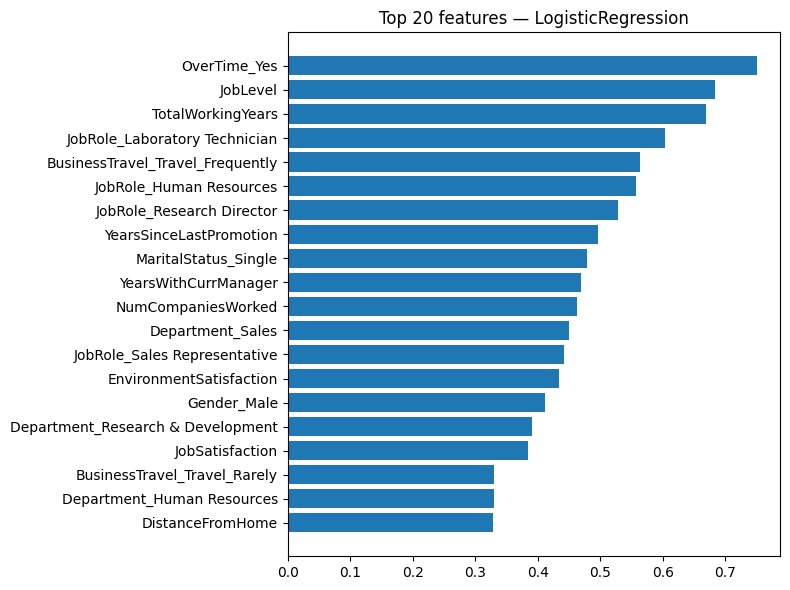

In [50]:
# Quick bar chart
plt.figure(figsize=(8,6))
plt.barh(fi["feature"][::-1], fi["importance"][::-1])
plt.title(f"Top 20 features — {best_name}")
plt.tight_layout()
plt.show()

In [51]:
#(Optional) Step 14 — Save artifacts for later use

from joblib import dump
import json, os

os.makedirs("models", exist_ok=True)
dump(best_model, "models/best_model.joblib")
with open("models/threshold.txt", "w") as f:
    f.write(str(best_threshold))

# Save headline metrics for your report (using the chosen model @ 0.5 for simplicity)
if best_name == "RandomForest":
    use_proba = rf_proba
else:
    use_proba = lr_proba

use_pred_05 = (use_proba >= 0.5).astype(int)
metrics = {
    "model": best_name,
    "accuracy": float(accuracy_score(y_test, use_pred_05)),
    "precision": float(precision_score(y_test, use_pred_05, zero_division=0)),
    "recall": float(recall_score(y_test, use_pred_05)),
    "f1": float(f1_score(y_test, use_pred_05)),
    "roc_auc": float(roc_auc_score(y_test, use_proba)),
    "best_f1_threshold": best_threshold
}

os.makedirs("reports", exist_ok=True)
with open("reports/metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

metrics

{'model': 'LogisticRegression',
 'accuracy': 0.7482993197278912,
 'precision': 0.3373493975903614,
 'recall': 0.5957446808510638,
 'f1': 0.4307692307692308,
 'roc_auc': 0.7985183909036093,
 'best_f1_threshold': 0.39810052228493176}

In [47]:
import os

print(os.listdir())  # current folder
if os.path.exists("data"):
    print("data folder contents:", os.listdir("data"))
if os.path.exists("models"):
    print("models folder contents:", os.listdir("models"))

['.venv', 'app.py', 'attrition.py', 'attrition_by_jobrole.png', 'data', 'Data_clean_process.ipynb', 'employee.ipynb', 'models', 'reports']
data folder contents: []
models folder contents: ['attrition_model.joblib', 'best_model.joblib', 'feature_columns.json', 'scaler.joblib', 'threshold.txt']


In [48]:
import os
print(os.listdir("data"))

[]


In [53]:
import os
os.makedirs("reports", exist_ok=True)
fi.to_csv("reports/feature_importance_top20.csv", index=False)
print("Saved at:", os.path.abspath("reports/feature_importance_top20.csv"))

Saved at: c:\Employee Attrition Analysis & Prediction\reports\feature_importance_top20.csv


In [54]:
import os
print("reports contents:", os.listdir("reports"))

reports contents: ['feature_importance_grouped.csv', 'feature_importance_raw.csv', 'feature_importance_top20.csv', 'metrics.json', 'top15_rf_importance_grouped.png', 'top20_rf_importance.png']
